In [158]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# 1 Data & Architecture

In [279]:
X = np.array(([3,5],[5,1],[10,2]), dtype=float)    # hours sleep, hours study - input matrix: 3 samples, 2 features
y = np.array(([75],[82],[95]), dtype=float)        # test score
#normalize data:
X = X / np.amax(X, axis=0)
y = y / 100
X.shape

(3, 2)

In [69]:
%%latex
\[
    \textsf{Neurons sum inputs from synapses}
\]
\[
    z = x1 + x2 + x3 = \sum xi
\]
\[
    \textsf{and apply a sigmoid activation function}
\]
\[
    a = \frac{1}{1 + e^{-z}}
\]

<IPython.core.display.Latex object>

# 2 Forward Propogation

In [255]:
class Neural_Network(object):
    def __init__(self):
        # define hyperparams (constants that establish structure & behaviour of network;not updated while training):
        self.inputLayerSize = 2 # corespond to number of features
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        # define params: weights on synapses
        self.W1 = np.random.randn(self.inputLayerSize , self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize , self.outputLayerSize)
        
    #2
    def forward(self,X):
        # propogate weights through network
        # use matrices to pass multiple inputs at once
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self,z):
        # apply sigmoind to scalar / vector / matrix
        return 1 / (1 + np.exp(-z))
    
    #3
    def sigmoidPrime(self,z):
        # backpropagation 
        return np.exp(-z) / ((1 + np.exp(-z))**2)
    
    #4
    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        # batch gradient descent
        # compute derivative with respect to W1 and W2
        # ie which way is uphill in our 9D optimization space
        self.yHat = self.forward(X)
        #backpropagation error: delta
        delta3 = np.multiply(-(y - yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3) 
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1, dJdW2
    
    #5
    def getParams(self):
        # get W1 and W2 rolled into 1 vector
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    def setParams(self, params):
        # Set W1 and W2 using single param vector
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
    
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X,y)
        return np.concatenate((dJdW1.ravel(),dJdW2.ravel()))
        
    
NN = Neural_Network()        

In [92]:
%%latex
\[
\begin{bmatrix}
    3 & 5 \\ 
    5 & 1 \\ 
    10 & 2
\end{bmatrix}
\begin{bmatrix}
    W_{11}^{(1)} & W_{12}^{(1)} & W_{13}^{(1)}\\ 
    W_{21}^{(1)} & W_{22}^{(1)} & W_{23}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
    3W_{11}^{(1)} + 5W_{21}^{(1)} & 3W_{12}^{(1)} + 5W_{22}^{(1)} & 3W_{13}^{(1)} + 5W_{23}^{(1)} \\ 
    5W_{11}^{(1)} + 1W_{21}^{(1)} & 5W_{12}^{(1)} + 1W_{22}^{(1)} & 5W_{13}^{(1)} + 1W_{23}^{(1)} \\
    10W_{11}^{(1)} + 2W_{21}^{(1)} & 10W_{12}^{(1)} + 2W_{22}^{(1)} & 10W_{13}^{(1)} + 2W_{23}^{(1)}
\end{bmatrix}
\]
\[
    X W^{(1)} = Z^{(2)}
\]

<IPython.core.display.Latex object>

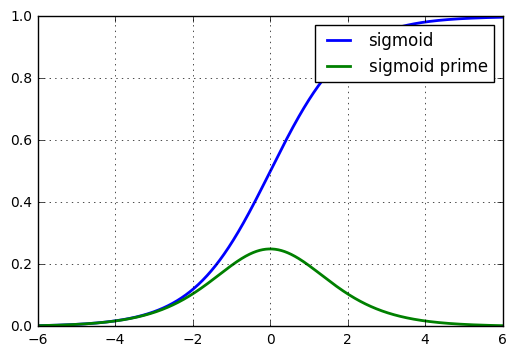

In [205]:

testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, NN.sigmoid(testInput), linewidth=2)
plt.plot(testInput, NN.sigmoidPrime(testInput), linewidth=2) # largest where sigmoid is steepest
plt.grid()
plt.legend(['sigmoid', 'sigmoid prime'])

In [119]:
%%latex
\[
    z^{(2)} = X W^{(1)}
\]
\[
    a^{(2)} = f(z^{(2)})
\]
\[
    z^{(3)} = a^{(2)}W^{(2)}
\]
\[\]
\[
W^{(2)} = 
\begin{bmatrix}
    W^{(2)}_{(11)}  \\ 
    W^{(2)}_{(21)}  \\ 
    W^{(2)}_{(31)} 
\end{bmatrix}  
\]
\[
    \hat{y} = f(z^{(3)})
\]

<IPython.core.display.Latex object>

In [135]:
yHat = NN.forward(X)
yHat

array([[ 0.53030683],
       [ 0.54199931],
       [ 0.55222292]])

# 3 Gradient Descent

In [157]:
%%latex
\[
    \textsf{cost function, assuming convexity}
\]
\[
   J = argmin(W) \sum_{i=0} \frac{1}{2} e_{i}^{2}
\]
\[
  J = argmin(W) \sum_{i=0} \frac{1}{2} (y_{i}- \hat{y_{i}})^{2}
\]
\[
    W^{(1)} \textsf{is a 3x3 matrix --> curse of dimensionality}
\]

<IPython.core.display.Latex object>

In [156]:
%%latex
\[
    \textsf{combined equation}
\]
\[
   J = argmin(W) \sum \frac{1}{2} (y - f(f(XW^{(1)})W^{(2)}))^2
\]
\[
    \textsf{minimize cost J by choosing weights W - examine rate of change (gradient): stop when}
\]
\[
    \frac{\partial J}{\partial W}=0
\]

<IPython.core.display.Latex object>

# 4 Backpropogation
* (a long chain rule)
* weights that contribute more to overall error will be changed more by SGD

In [160]:
display(NN.W1, NN.W1.shape)
display(NN.W2, NN.W2.shape)

array([[ 0.22224692, -0.27898779,  1.71877036],
       [ 0.23482195, -2.14545752, -0.10447487]])

(2, 3)

array([[-0.16169648],
       [ 0.02736267],
       [ 0.35196909]])

(3, 1)

In [177]:
%%latex
\[
\frac{\partial J}{\partial W^{(1)}}=
\begin{bmatrix}
    \frac{ \partial J}{ \partial{W_{11}^{(1)}}} & 
    \frac{ \partial J}{ \partial{W_{12}^{(1)}}} & 
    \frac{ \partial J}{ \partial{W_{13}^{(1)}}}\\ 
    \frac{ \partial J}{ \partial{W_{21}^{(1)}}} & 
    \frac{ \partial J}{ \partial{W_{22}^{(1)}}} & 
    \frac{ \partial J}{ \partial{W_{23}^{(1)}}}
\end{bmatrix}
\]
\[
    
\]
\[
\frac{\partial J}{\partial W^{(2)}}=
\begin{bmatrix}
    \frac{ \partial J}{ \partial{W_{11}^{(2)}}} \\ 
    \frac{ \partial J}{ \partial{W_{21}^{(2)}}} \\
    \frac{ \partial J}{ \partial{W_{31}^{(2)}}}
\end{bmatrix}
\]


<IPython.core.display.Latex object>

In [207]:
%%latex
\[
    \textsf{sum rule in differentiation}
\]
\[
    \frac{d(u + v)}{dx} = \frac{du}{dx} + \frac{dv}{dx}
\]
\[\]
\[
    \textsf{chain rule in differentiation}
\]
\[
    (f \circ g)' = (f' \circ g) \cdot g'
\]
\[\]
\[
    \frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}
\]

<IPython.core.display.Latex object>

In [229]:
%%latex
\[\]
\[
\frac{\partial J}{\partial W^{(2)}} = 
\frac{\partial \sum{\frac{1}{2}(y - \hat{y})^2}}{\partial W^{(2)}} = 
\sum{\frac{\partial \frac{1}{2}(y - \hat{y})^2}{\partial W^{(2)}}}
\]
\[\]
\[
   \textsf{power rule and chain rule} 
\]
\[
\begin{bmatrix}
    -y_{1} - \hat{y_{1}} \\ 
    -y_{2} - \hat{y_{2}} \\
    -y_{3} - \hat{y_{3}}
\end{bmatrix}
\begin{bmatrix}
    f'(z_{1}^{(3)}) \\ 
    f'(z_{2}^{(3)}) \\
    f'(z_{3}^{(3)})
\end{bmatrix}
=
\begin{bmatrix}
    \delta _{1}^{(3)} \\ 
    \delta _{2}^{(3)} \\
    \delta _{3}^{(3)} 
\end{bmatrix}  
    = \delta ^{(3)}
\]
\[
    (a^{(2)})^{T} \delta ^{(3)} = 
\begin{bmatrix}
    a_{11}^{(2)} & a_{21}^{(2)} & a_{31}^{(2)} \\ 
    a_{12}^{(2)} & a_{22}^{(2)} & a_{32}^{(2)} \\
    a_{13}^{(2)} & a_{23}^{(2)} & a_{33}^{(2)}  
\end{bmatrix}     
\begin{bmatrix}
    \delta _{1}^{(3)} \\ 
    \delta _{2}^{(3)} \\
    \delta _{3}^{(3)} 
\end{bmatrix} 
    =
\begin{bmatrix}
    a_{11}^{(2)} \delta _{1}^{(3)} + a_{21}^{(2)} \delta _{2}^{(3)} + a_{31}^{(2)} \delta _{3}^{(3)} \\ 
    a_{12}^{(2)} \delta _{1}^{(3)} + a_{22}^{(2)} \delta _{2}^{(3)} + a_{32}^{(2)} \delta _{3}^{(3)} \\
    a_{13}^{(2)} \delta _{1}^{(3)} + a_{23}^{(2)} \delta _{2}^{(3)} + a_{33}^{(2)} \delta _{3}^{(3)} 
\end{bmatrix}     
\]

<IPython.core.display.Latex object>

simple linear relationship for:
* each hidden-layer to output-layer synapse: dW2/dZ3 = a2 
* each hidden-layer to output-layer synapse: dZ3/da2 = W2
* each input-layer to hidden-layer synapse:  dZ2/dW1 = X

In [234]:
%%latex
\[
    \frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^{T} \delta ^{(3)}
\]
\[\]
\[
    \delta ^{(3)} = -(y - \hat{y})f'(z^{(3)})
\]
\[\]
\[
    \frac{\partial J}{\partial W^{(1)}} = X^{T} \delta ^{(2)}
\]
\[\]
\[
    \delta ^{(2)} = \delta ^{(3)} (W^{(1)})^{T} f'(z^{(2)})
\]

<IPython.core.display.Latex object>

In [242]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
dJdW1, dJdW2

(array([[ 0.02356812, -0.02571859,  0.05172803],
        [ 0.02094194, -0.02520551,  0.03866296]]), array([[-0.03604346],
        [-0.05906128],
        [-0.09162464]]))

In [244]:
scalar = 3
NN.W1 = NN.W1 + scalar * dJdW1
NN.W2 = NN.W2 + scalar * dJdW2
NN.costFunction(X,y)

array([ 0.48228807])

# 5 Numerical Gradient

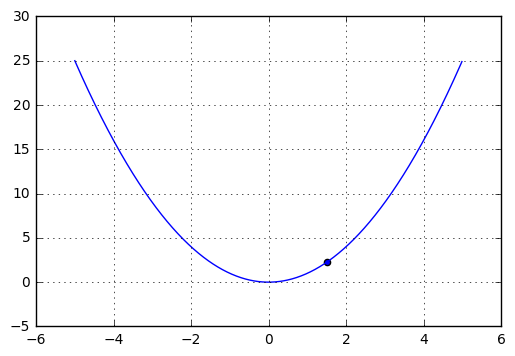

In [245]:
x = np.arange(-5, 5, 0.01)
plt.plot(x, x**2, 'b')
plt.grid(1)
plt.scatter(1.5, 1.5**2)

In [251]:
def f(x):
    return x**2
epsilon = 1e-4
x = 1.5

numericGradient = (f(x+epsilon) - f(x-epsilon))/(2 * epsilon)
# verification:
numericGradient, 2*x

(2.9999999999996696, 3.0)

In [253]:
NN.getParams()

array([-0.10832181,  0.29157752, -2.32875267, -0.79858892,  0.77523413,
        0.01438056,  0.45891691, -1.01902928,  0.55968482])

In [260]:
def computeNumericalGradients(N,X,y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4
    for p in range(len(paramsInitial)):
        # set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss1 = N.costFunction(X,y)
        N.setParams(paramsInitial - perturb)
        loss2 = N.costFunction(X,y)
        
        #compute numerical gradient
        numgrad[p] = (loss2 - loss1) / (2*e)
        
        #reset
        perturb[p] = 0
    #reset
    N.setParams(paramsInitial)
    return numgrad

numgrad = computeNumericalGradients(NN,X,y)
grad = NN.computeGradients(X,y)
display(numgrad, grad)  # similar      

np.linalg.norm(grad - numgrad) / np.linalg.norm(grad+numgrad) # not sure about this

array([-0.0269274 , -0.00625294,  0.0535152 , -0.01712459, -0.00425763,
        0.03704035,  0.0800578 ,  0.12394559,  0.0490642 ])

array([ 0.02535875,  0.00589676, -0.05122405,  0.01697504,  0.00424728,
       -0.03729985, -0.07870872, -0.1205269 , -0.04933063])

73.212293905780498

# 6 Training
BFGS Quasi-Newton optimization of SGD - leverages Hessian

In [266]:
from scipy import optimize

class Trainer(object):
    def __init__(self,N):
        self.N = N
        
    def costFuncWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        
    def train(self, X, y):
        self.X = X
        self.y = y
        self.J = [] # costs
        params0 = self.N.getParams()
        options = {'maxiter': 200, 'disp': True}
        # set jacobian
        _res = optimize.minimize( \
             self.costFuncWrapper, params0, jac=True, method='BFGS', args=(X,y), options=options, callback=self.callbackF)
        self.N.setParams(_res.x)
        self.optimizationResults = _res

         Current function value: 0.040577
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84


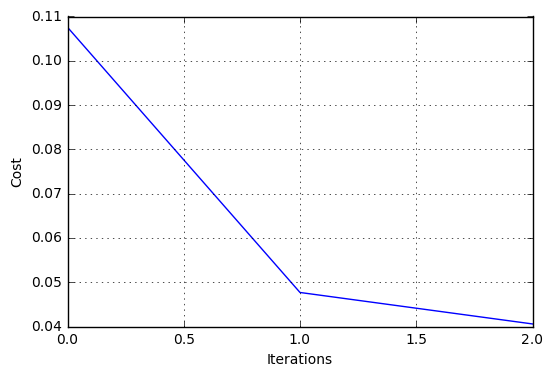

In [280]:
NN = Neural_Network()
T = Trainer(NN)
T.train(X,y)
plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')
#hmmmm ....

In [281]:
NN.costFunctionPrime(X,y)

(array([[-0.02306668, -0.05445037, -0.00996909],
        [-0.01709984, -0.02921199, -0.00573783]]), array([[-0.00477078],
        [-0.02088484],
        [-0.00580673]]))

In [282]:
NN.forward(X), y 

(array([[ 0.96101082],
        [ 0.96878685],
        [ 0.8296233 ]]), array([[ 0.75],
        [ 0.82],
        [ 0.95]]))

# 7 Overfitting

In [284]:
# fit the signal, not the noise
# TODO: regularize the cost function